<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/svm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(40000,)


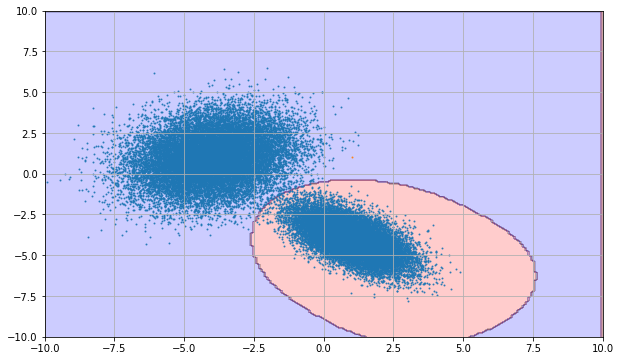

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import svm

def plot_boundaries():
  G       = 200
  x       = np.linspace(-10, 10, G)
  y       = np.linspace(-10, 10, G)
  xv, yv  = np.meshgrid(x, y)

  F       = np.zeros((G,G))
  for k in range(0,G-1):
    for m in range(0,G-1):
      x   = np.array([ [xv[k,m]], [yv[k,m]] ])
      f1  = clf.predict( x.transpose() )
      F[k,m] = f1 > 0

  plt.contourf( xv, yv, F, colors=['red','black','blue','gray'], alpha=0.2 )


N         = 20000
mu1       = np.array([ [-4], [1] ])
mu2       = np.array([ [1], [-4] ])
sigma1    = np.array([ [2, 0.4], [0.4, 2] ])
sigma2    = np.array([ [1, -0.6], [-0.6, 1] ])

s1     = np.linalg.cholesky( sigma1 )
s2     = np.linalg.cholesky( sigma2 )


#print(np.shape(mu1))
vmu1  = np.tile(mu1,(1,N))
#print(np.shape(mu1))
x1    = s1 @ np.random.randn(2,N) + vmu1

vmu2  = np.tile(mu2,(1,N))
x2    = s2 @ np.random.randn(2,N) + vmu2

X     = np.hstack( [x1,x2] )
y     = np.hstack( [np.ones((N,)),-np.ones((N,))])

clf   = svm.SVC()
clf.fit(X.transpose(), y.transpose())

labels =  clf.predict(X.transpose())

print(labels.shape)

fig = plt.figure(figsize=[10,6])
plot_boundaries()

plt.scatter( X[0], X[1], s=1, alpha=0.85  )
plt.scatter( y[0], y[1], s=1, alpha=0.85 )

plt.grid(True)